In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


# Know your Data
## Read the data to a dataframe

In [2]:
df = pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv", index_col=[0])
df

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


## Get the information about the data

**Change object classes to numbers**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       20000 non-null  int64 
 1   post_created  20000 non-null  object
 2   post_text     20000 non-null  object
 3   user_id       20000 non-null  int64 
 4   followers     20000 non-null  int64 
 5   friends       20000 non-null  int64 
 6   favourites    20000 non-null  int64 
 7   statuses      20000 non-null  int64 
 8   retweets      20000 non-null  int64 
 9   label         20000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.7+ MB


In [4]:
df.describe()

,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


## Change post-created column to datetime format

In [5]:
df['post_created']

0        Sun Aug 30 07:48:37 +0000 2015
1        Sun Aug 30 07:31:33 +0000 2015
2        Sat Aug 29 22:11:07 +0000 2015
3        Sat Aug 29 18:40:49 +0000 2015
4        Sat Aug 29 18:40:26 +0000 2015
                      ...              
19995    Thu Jan 12 00:14:56 +0000 2017
19996    Thu Jan 12 00:06:18 +0000 2017
19997    Thu Jan 12 00:05:42 +0000 2017
19998    Thu Jan 12 00:05:22 +0000 2017
19999    Thu Jan 12 00:04:47 +0000 2017
Name: post_created, Length: 20000, dtype: object

In [6]:
# Just to check whether there is any data which doesn't match the pattern in post_created
# Check by length comparison
for i,j in zip(df['post_created'],df['post_created'][1:-1]):
    ii = i.split()
    jj = j.split()
    for k,l in zip(ii,jj):
#         print(k,l)
        if(len(k) != len(l)):
            print("Different Lengths")

## Creating more features from the date time.

In [7]:
def month(mm):
    months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i,j in enumerate(months):
        if mm == j:
            return i+1

def day(dd):
    days=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    for i,j in enumerate(days):
        if dd == j:
            return i+1     
        
new_dict = {}
new_dict["Day"]=[]
new_dict["MM"]=[]
new_dict["DD"]=[]
new_dict["TT"]=[]
new_dict["+00"]=[]
# new_dict["DTE"]=[]
new_dict["YY"]=[]
new_dict["DTT"]=[]
for i in df["post_created"]:
    ii = i.split()
    new_dict["Day"].append(day(ii[0]))
    new_dict["MM"].append(month(ii[1]))
    new_dict["DD"].append(int(ii[2]))
    new_dict["TT"].append(ii[3])
    new_dict["+00"].append(ii[4])
    new_dict["YY"].append(int(ii[5])) 
    # new_dict["DTE"].append(f"{ii[5]}-{month(ii[1])}-{ii[2]}")
    new_dict["DTT"].append(f"{ii[5]}/{month(ii[1])}/{ii[2]} {ii[3]}")

In [8]:
pd.DataFrame(new_dict).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     20000 non-null  int64 
 1   MM      20000 non-null  int64 
 2   DD      20000 non-null  int64 
 3   TT      20000 non-null  object
 4   +00     20000 non-null  object
 5   YY      20000 non-null  int64 
 6   DTT     20000 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [9]:
pd.DataFrame(new_dict)['+00'].unique()

array(['+0000'], dtype=object)

In [10]:
type(new_dict)

dict

## Configuring for adding timestamp and then adding timestamp

In [11]:
# Since there is no unique value in +00 so, there is no need of that data
# Change the object data for dtt to datetime
from datetime import datetime as dt
for key, val in new_dict.items():
    if(key not in ['+00', 'TT']):
        df[key] = val
    if(key == 'DTT'):
        # Using df[["col1", "col2", "col3"]].apply(pd.to_datetime)
        df[[key]] = df[[key]].apply(pd.to_datetime)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   post_id       20000 non-null  int64         
 1   post_created  20000 non-null  object        
 2   post_text     20000 non-null  object        
 3   user_id       20000 non-null  int64         
 4   followers     20000 non-null  int64         
 5   friends       20000 non-null  int64         
 6   favourites    20000 non-null  int64         
 7   statuses      20000 non-null  int64         
 8   retweets      20000 non-null  int64         
 9   label         20000 non-null  int64         
 10  Day           20000 non-null  int64         
 11  MM            20000 non-null  int64         
 12  DD            20000 non-null  int64         
 13  YY            20000 non-null  int64         
 14  DTT           20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(12), obj

In [12]:
df['TS'] = df[['DTT']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,Day,MM,DD,YY,DTT,TS
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,1,8,30,2015,2015-08-30 07:48:37,1440920917
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,1,8,30,2015,2015-08-30 07:31:33,1440919893
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,7,8,29,2015,2015-08-29 22:11:07,1440886267
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,7,8,29,2015,2015-08-29 18:40:49,1440873649
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,7,8,29,2015,2015-08-29 18:40:26,1440873626


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   post_id       20000 non-null  int64         
 1   post_created  20000 non-null  object        
 2   post_text     20000 non-null  object        
 3   user_id       20000 non-null  int64         
 4   followers     20000 non-null  int64         
 5   friends       20000 non-null  int64         
 6   favourites    20000 non-null  int64         
 7   statuses      20000 non-null  int64         
 8   retweets      20000 non-null  int64         
 9   label         20000 non-null  int64         
 10  Day           20000 non-null  int64         
 11  MM            20000 non-null  int64         
 12  DD            20000 non-null  int64         
 13  YY            20000 non-null  int64         
 14  DTT           20000 non-null  datetime64[ns]
 15  TS            20000 non-null  int64 

## Checking and deleting the duplicate rows

In [14]:
# Check the duplicated row and delete them
# df = df.drop(['post_created', 'post_id'], axis=1)
len(df.loc[df.duplicated()==1])

117

In [15]:
# Delete the duplicated row
df_del = df.loc[df.duplicated()==1]
df = df.drop(df_del.index, axis=0)

In [16]:
df = df.reset_index(drop=True)

## Checking and deleting the duplicate tweets

In [17]:
# Check any duplicate tweet
df_del = df.loc[df['post_id'].duplicated()==1]
df = df.drop(df_del.index, axis=0)
df = df.reset_index(drop=True)

In [18]:
df

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,Day,MM,DD,YY,DTT,TS
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,1,8,30,2015,2015-08-30 07:48:37,1440920917
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,1,8,30,2015,2015-08-30 07:31:33,1440919893
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,7,8,29,2015,2015-08-29 22:11:07,1440886267
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,7,8,29,2015,2015-08-29 18:40:49,1440873649
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,7,8,29,2015,2015-08-29 18:40:26,1440873626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:14:56,1484180096
19877,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:06:18,1484179578
19878,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:05:42,1484179542
19879,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:05:22,1484179522


In [19]:
df.loc[df.duplicated(subset=['post_text', 'post_created'])==1]

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,Day,MM,DD,YY,DTT,TS


***No Duplicates left***

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19881 entries, 0 to 19880
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   post_id       19881 non-null  int64         
 1   post_created  19881 non-null  object        
 2   post_text     19881 non-null  object        
 3   user_id       19881 non-null  int64         
 4   followers     19881 non-null  int64         
 5   friends       19881 non-null  int64         
 6   favourites    19881 non-null  int64         
 7   statuses      19881 non-null  int64         
 8   retweets      19881 non-null  int64         
 9   label         19881 non-null  int64         
 10  Day           19881 non-null  int64         
 11  MM            19881 non-null  int64         
 12  DD            19881 non-null  int64         
 13  YY            19881 non-null  int64         
 14  DTT           19881 non-null  datetime64[ns]
 15  TS            19881 non-null  int64 

## Checking for any null/missing values

In [21]:
df.isna().sum()

post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
Day             0
MM              0
DD              0
YY              0
DTT             0
TS              0
dtype: int64

## Removing the unwanted dataset

In [22]:
# Drop unneccessary information like post id and post created
df = df.drop(['post_id', 'post_created'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19881 entries, 0 to 19880
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   post_text   19881 non-null  object        
 1   user_id     19881 non-null  int64         
 2   followers   19881 non-null  int64         
 3   friends     19881 non-null  int64         
 4   favourites  19881 non-null  int64         
 5   statuses    19881 non-null  int64         
 6   retweets    19881 non-null  int64         
 7   label       19881 non-null  int64         
 8   Day         19881 non-null  int64         
 9   MM          19881 non-null  int64         
 10  DD          19881 non-null  int64         
 11  YY          19881 non-null  int64         
 12  DTT         19881 non-null  datetime64[ns]
 13  TS          19881 non-null  int64         
dtypes: datetime64[ns](1), int64(12), object(1)
memory usage: 2.1+ MB


In [23]:
import datetime
df['DOY'] = df['DTT'].dt.dayofyear
df

,post_text,user_id,followers,friends,favourites,statuses,retweets,label,Day,MM,DD,YY,DTT,TS,DOY
0,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,1,8,30,2015,2015-08-30 07:48:37,1440920917,242
1,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,1,8,30,2015,2015-08-30 07:31:33,1440919893,242
2,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,7,8,29,2015,2015-08-29 22:11:07,1440886267,241
3,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,7,8,29,2015,2015-08-29 18:40:49,1440873649,241
4,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,7,8,29,2015,2015-08-29 18:40:26,1440873626,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:14:56,1484180096,12
19877,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:06:18,1484179578,12
19878,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:05:42,1484179542,12
19879,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,5,1,12,2017,2017-01-12 00:05:22,1484179522,12


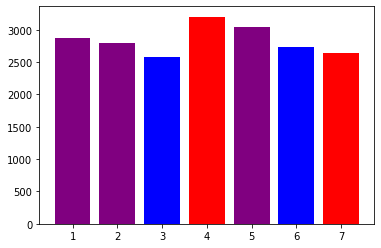

In [24]:
# Let's analyze the datasets
import matplotlib.pyplot as plt

# Plotting number of tweets day of the weekwise
plt.bar(df['Day'].unique(), [heights for heights in df.groupby('Day')['Day'].count()], color=['Purple', 'Red', 'Blue']);

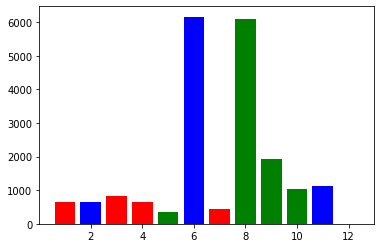

In [25]:
# Plotting number of tweets month of the yearwise
plt.bar(df['MM'].unique(), [i for i in df.groupby('MM')['MM'].count()], color=['Green', 'Red', 'Blue']);

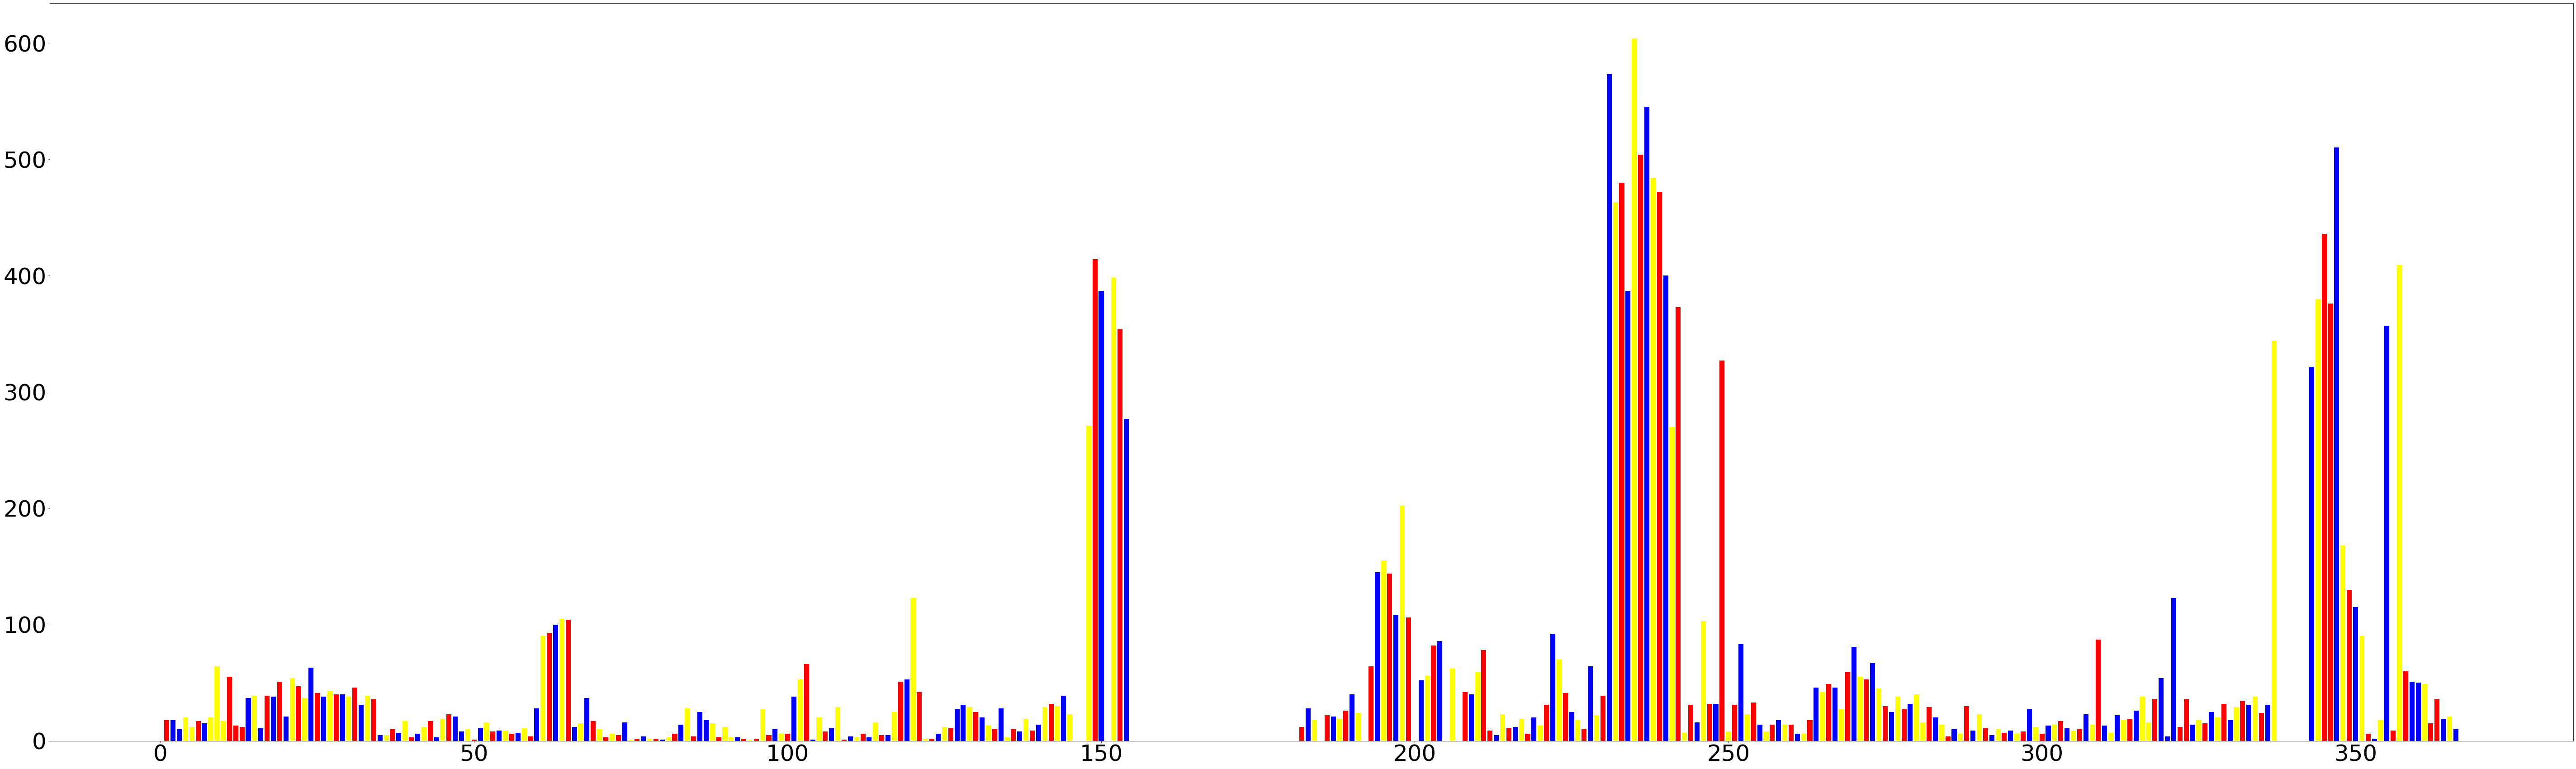

In [26]:
# Plotting number of tweets day of the yearwise
plt.figure(figsize=(100,30))
plt.bar(df['DOY'].unique(), [i for i in df.groupby('DOY')['DOY'].count()], color=['Red', 'Yellow', 'Blue'])
plt.xticks(fontsize=50);
plt.yticks(fontsize=50);
# plt.xlim(150,200)

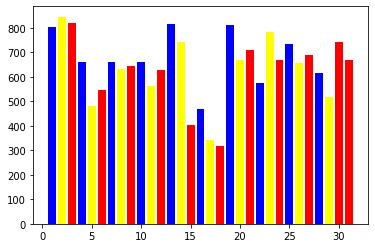

In [27]:
# Plotting number of tweets day of the month
plt.bar(df['DD'].unique(), [i for i in df.groupby('DD')['DD'].count()], color=['Red', 'Yellow', 'Blue']);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19881 entries, 0 to 19880
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   post_text   19881 non-null  object        
 1   user_id     19881 non-null  int64         
 2   followers   19881 non-null  int64         
 3   friends     19881 non-null  int64         
 4   favourites  19881 non-null  int64         
 5   statuses    19881 non-null  int64         
 6   retweets    19881 non-null  int64         
 7   label       19881 non-null  int64         
 8   Day         19881 non-null  int64         
 9   MM          19881 non-null  int64         
 10  DD          19881 non-null  int64         
 11  YY          19881 non-null  int64         
 12  DTT         19881 non-null  datetime64[ns]
 13  TS          19881 non-null  int64         
 14  DOY         19881 non-null  int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 2.3+ MB


In [29]:
k = []
for i in df['post_text']:
    k.append(len(i))
max(k), min(k)

(169, 4)

## Preprocessing the `post_text` dataset

## Using HashingVectorizer and TfidfVectorizer

TfidfVectorizer calculates the term-frequency and inverse document frequency of the sentences and take their dot-product to give a matrix that describes which word has how much significance over the given sentence.

HashingVectorizer-for large data sets it is very low memory scalable. As there in no state during the fit, it can be used in a streaming or parallel pipeline.

In [30]:
data = df['post_text']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19881 entries, 0 to 19880
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   post_text   19881 non-null  object        
 1   user_id     19881 non-null  int64         
 2   followers   19881 non-null  int64         
 3   friends     19881 non-null  int64         
 4   favourites  19881 non-null  int64         
 5   statuses    19881 non-null  int64         
 6   retweets    19881 non-null  int64         
 7   label       19881 non-null  int64         
 8   Day         19881 non-null  int64         
 9   MM          19881 non-null  int64         
 10  DD          19881 non-null  int64         
 11  YY          19881 non-null  int64         
 12  DTT         19881 non-null  datetime64[ns]
 13  TS          19881 non-null  int64         
 14  DOY         19881 non-null  int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 2.3+ MB


In [32]:
%%time
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

text_vectorizer = make_pipeline(
    HashingVectorizer(n_features=2 ** 20),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=42),
    Normalizer(copy=False),
)

myvect_arr = text_vectorizer.fit_transform(df['post_text'])

CPU times: user 1min 12s, sys: 17.2 s, total: 1min 29s
Wall time: 37.6 s


In [33]:
myvect_arr.shape

(19881, 100)

In [34]:
df.label.unique()

array([1, 0])

**Removing the unecessary datetime variable**

In [35]:
for i in range(myvect_arr.shape[-1]):
    dummy_df = pd.DataFrame(myvect_arr[:,i], columns=[f'textFeature_{i+1}'])
    df = pd.concat([df,dummy_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19881 entries, 0 to 19880
Columns: 115 entries, post_text to textFeature_100
dtypes: datetime64[ns](1), float64(100), int64(13), object(1)
memory usage: 17.4+ MB


## Making train_test_Split for training and testing our dataset in a classifier model

In [36]:
from sklearn.model_selection import train_test_split
data = df.drop(['post_text', 'label', 'DTT'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, df['label'], test_size=0.33, random_state=42)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 2056 to 15795
Columns: 112 entries, user_id to textFeature_100
dtypes: float64(100), int64(12)
memory usage: 11.5 MB


## Training our dataset to an ensemble randomforestclassifier

As we know that the data is supervised by the label and the label only contains 0s and 1s. Hence, the best fit for such dataset is the RandomForestClassifier. We can furthur standardise our parameters before fitting into the classifier if our dataset doesn't perform well.

In [66]:
from sklearn.neighbors import KNeighborsClassifier as cclf
clf = cclf(n_neighbors=50)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [68]:
from sklearn.model_selection import cross_val_score
y_preds = clf.predict(X_test)
cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9983483483483482

In [69]:
cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy').mean()

0.9940553424479409

## Conclusion from training and testing
Since our model is performing perfectly with an accuracy of 99.9% (training) and 99.7%(testing), there is no need to standardise the data. We can tolerate a 0.3% error. Let's see some other evaluation techniques to get more information of how good our model is.

## The importance of each features is given.

In [70]:
plt.figure(figsize=(200,50))
plt.bar(X_train.columns, clf.feature_importances_, color=['Red', 'Yellow', 'Green', 'Blue'])
plt.xticks(fontsize=60, rotation=90);
plt.yticks(fontsize=100);
plt.xlim('textFeature_1','textFeature_100');

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

<Figure size 14400x3600 with 0 Axes>

In [71]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, clf.feature_importances_, color=['Red', 'Yellow', 'Green', 'Blue'])
plt.xticks(fontsize=30, rotation=90);
plt.yticks(fontsize=30);
plt.xlim('user_id','DOY');

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

<Figure size 720x720 with 0 Axes>

## Classification report for the ensemble model

In [72]:
from sklearn.metrics import classification_report as clf_rpt
y_true = y_test
y_pred = clf.predict(X_test)
print(clf_rpt(y_test, y_pred, target_names=['non-depressing', 'depressing']))

                precision    recall  f1-score   support

non-depressing       1.00      1.00      1.00      3261
    depressing       1.00      1.00      1.00      3300

      accuracy                           1.00      6561
     macro avg       1.00      1.00      1.00      6561
  weighted avg       1.00      1.00      1.00      6561



## Confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


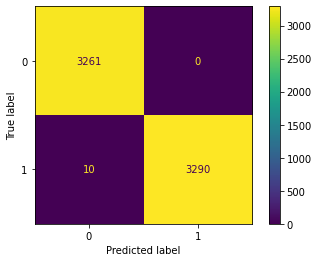

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);

## ROC curve tells how much percentage of the data will be predicted correctly by our model.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


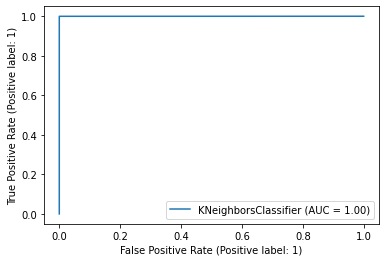

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test) 

`Here the AUC=1, i.e., 100% data will be predicted correctly.`